In [1]:
# Default Libraries
import os
import StringIO

# External Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from IPython.display import FileLink, FileLinks

# Own Libraries
import rstoolbox  # Learn about this library at: http://lpdi-epfl.github.io/RosettaSilentToolbox

import readme

# Global Parameters
plt.rcParams['svg.fonttype'] = 'none'
rstoolbox.utils.format_Ipython()

# Target-biased folding and design of protein binders

In this benchmark we will mimic the generation of the BCL2-homologue binder **BINDI**, which structure can be found in [4OYD](pdbs/4oyd.pdb.gz).

We will generate the design using [3LHP](pdbs/3lhp.pdb.gz) as template and [2WH6](pdbs/2wh6.pdb.gz) as the motif source.

We will test **four** different conditions: withouth the target binder (**no_target**), with the target fixed (**static**), allowing repacking of the target (**pack**) or allowing repacking and minimization of the target (**packmin**).

## Generating the designs

The designs are generated with the RosettaScript [4oydMimic.classicFFL.xml](scripts/4oydMimic.classicFFL.xml), using the [SLURM](https://slurm.schedmd.com/)-based submiter script [submiter.ffl.cscs.sh](scripts/submiter.ffl.cscs.sh). This RosettaScript allows through script variable to call for the different conditions needed in this benchmark.

## Evaluating the designs

There are four extra evaluations performed to the designs:

1. **Clash with the binder:** Done with [binder_clash.xml](scripts/binder_clash.xml), it evaluates *"current ddg"*. In the case of the **no_target** this will mean first adding the binder through homology docking guided by the binding motif.

2. **Minimized ddG:** Done with [binder_evaluate.xml](scripts/binder_evaluate.xml). After all populations have a target, both design and target are minimized. Data, from ddG to RMSD drift for both partners is recorded.

3. **Extra RMSD:** Done with [extra_rmsd.xml](scripts/extra_rmsd.xml). Performs localized comparissons between the desings and **BINDI** after aligning them through the binding motif.

4. **Lone Minimization:** Done with [minimize_evaluate.xml](scripts/minimize_evaluate.xml). Removes the target from all designs and allows full protein minimization. Aims to show that the designs folded in the presence of the target are still stable without it.

In-detail analysis of this benchmark if fully described in the paper.

In [2]:
df = readme.get_data()

In [3]:
df.groupby(["binder_state"]).mean()

,BUNS,GlobalRMSD,LocalRMSD,LocalRMSDH,LocalRMSDL,RMSDTargetH1,RMSDTargetH13,RMSDTargetH2,RMSDTargetH3,RMSDTargetHL1,RMSDTargetHL13,RMSDTargetHL2,RMSDTargetHL3,bb_clash,cav_vol,cluster,ddg_binder_rmsd_drift,ddg_cav_vol,ddg_design_rmsd_drift,ddg_design_score,ddg_packstat,decoy,driftRMSD,min_cav_vol,min_clash,min_design_score,min_packstat,minimize_design_rmsd_drift,packstat,post_ddg,pre_ddg,score
binder_state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no_target,10.645954,2.151566,4.770413,4.719378,3.711406,5.064217,5.650077,2.185332,6.138954,4.013761,4.515533,1.031468,4.992342,3704.490899,72.997689,33770.857143,5.598507,304.239200,9.715436,3964.584411,0.623328,286.5,1.222154,42.819340,3723.484381,-97.064495,0.649343,0.011258,0.611599,3250.444435,23118.470380,-317.114426
pack,11.477772,2.007488,3.584016,3.358317,2.549148,3.719662,3.789743,2.314444,3.827599,3.088858,3.048557,0.994794,2.956591,-0.522198,332.850372,37108.971429,0.537957,376.985835,0.392404,-282.758925,0.582822,286.5,0.967775,1.152533,23.642614,-97.013998,0.716389,0.250825,0.580166,-46.502266,-46.876536,-278.813494
packmin,11.474326,2.022156,3.540686,3.328715,2.543151,3.675270,3.768476,2.267026,3.828166,3.077268,3.040834,0.999860,2.954572,-0.459576,330.959053,42384.914286,0.344020,362.287564,0.336624,-283.277633,0.583928,286.5,0.986022,1.103162,23.817923,-94.872507,0.718864,0.135840,0.582198,-47.952486,-55.762767,-277.394847
static,13.153247,2.292051,4.066531,3.799188,2.675837,4.164249,4.322228,2.533750,4.442876,3.193307,3.212538,0.993440,3.192598,-0.539167,323.560895,37819.085714,0.533314,388.295518,0.406066,-293.721804,0.602167,286.5,1.369097,0.699613,6.678909,-98.885686,0.656860,0.172529,0.595600,-47.769662,-42.803151,-287.496443


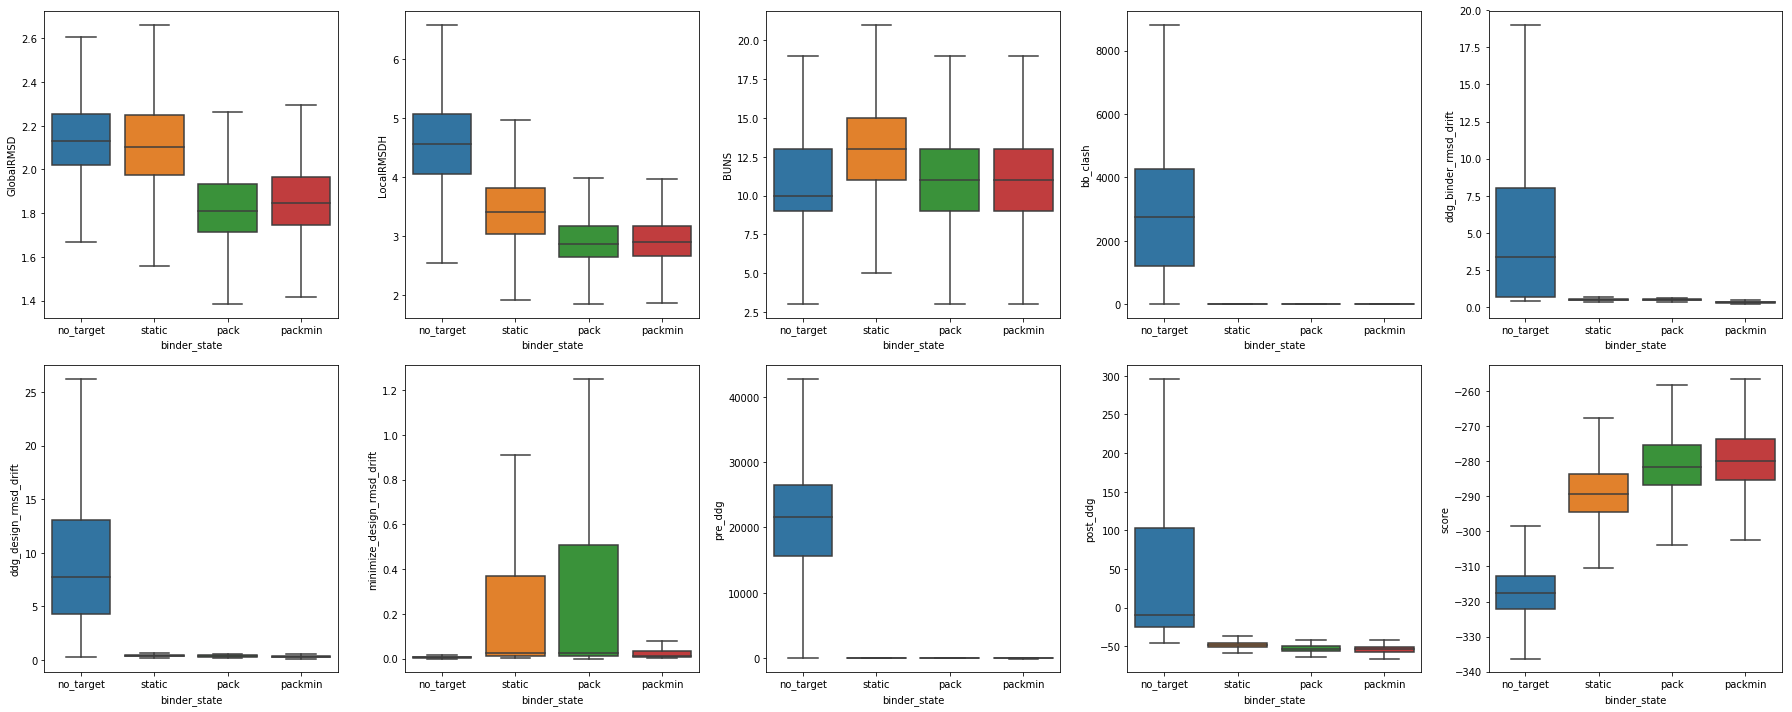

In [4]:
readme.plot_preview(df)    

# BINDI Deep-Sequence Comparisson

The scoring is performed using as a PSSM the provided deep-sequence scoring matrix: [BINDI-deep-seq-analysis.csv](BINDI-deep-seq-analysis.csv), and fully explained in the text.